# Regression Trees

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [98]:
dataset = pd.read_csv('../bases/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### TODO 1

Remova as colunas Administration e State do dataset

In [99]:
#resposta
dataset.drop(['Administration','State'],axis=1,inplace=True)

### TODO 2
Separe o dataset em vetor de características e variável meta

In [100]:
#resposta
X = dataset.drop('Profit',axis=1) # petal length and width
y = dataset.Profit

### TODO 3
Treine um modelo de regressão usando Regression Tree

In [101]:
#resposta
# reg = DecisionTreeRegressor(max_depth=2, min_samples_split=3)
reg = DecisionTreeRegressor()
reg.fit(X,y)

DecisionTreeRegressor()

In [102]:
from sklearn import tree
print(tree.export_text(reg))

|--- feature_0 <= 77528.56
|   |--- feature_0 <= 25766.92
|   |   |--- feature_0 <= 771.14
|   |   |   |--- feature_1 <= 22586.53
|   |   |   |   |--- feature_0 <= 271.02
|   |   |   |   |   |--- value: [42559.73]
|   |   |   |   |--- feature_0 >  271.02
|   |   |   |   |   |--- value: [35673.41]
|   |   |   |--- feature_1 >  22586.53
|   |   |   |   |--- value: [14681.40]
|   |   |--- feature_0 >  771.14
|   |   |   |--- feature_1 <= 241189.78
|   |   |   |   |--- feature_1 <= 166633.10
|   |   |   |   |   |--- feature_1 <= 31934.45
|   |   |   |   |   |   |--- feature_1 <= 15119.33
|   |   |   |   |   |   |   |--- value: [64926.08]
|   |   |   |   |   |   |--- feature_1 >  15119.33
|   |   |   |   |   |   |   |--- value: [65200.33]
|   |   |   |   |   |--- feature_1 >  31934.45
|   |   |   |   |   |   |--- feature_1 <= 91767.64
|   |   |   |   |   |   |   |--- value: [69758.98]
|   |   |   |   |   |   |--- feature_1 >  91767.64
|   |   |   |   |   |   |   |--- value: [71498.49]
|   |

### TODO 4
Suponha que a empresa tenha um orçamento de R$ 500.000,00.

Eles estão considerando três opções:

> R&D: 300.000,00 ; Marketing: 200.000,00

> R&D: 200.000,00 ; Marketing: 300.000,00

> R&D: 100.000,00 ; Marketing: 400.000,00

Qual opção irá, a partir do modelo treinado, retornar o maior lucro?

In [103]:
# resposta
print(reg.predict([['300000','200000']]))
print(reg.predict([['200000','300000']]))
print(reg.predict([['100000','400000']]))

[166187.94]
[166187.94]
[125370.37]


C:\Users\logonrmlocal\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\logonrmlocal\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\logonrmlocal\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


# Decision Trees

In [104]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [105]:
#fazendo o download dos dados direto dos datasets presente na scikit-learn
data = datasets.load_breast_cancer()
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [106]:
#variável meta (target) -> aquilos que estamos tentando prever
#no caso: cancer benigno ou maligno
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [107]:
#linhas x colunas
data.data.shape

(569, 30)

In [108]:
#visualizando as 5 primeiras amostras
data.data[0:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

## TODO 1
> Separe o dataset em conjunto de treino e teste, sendo 70% para treino e 30% para teste

In [109]:
#resposta

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

X = df.drop('target',axis=1)
y = df.target

#separando o arquivo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## TODO 2
> Treine uma Árvore de Decisão. Teste com diferentes valores de max_depth e compare os resultados

In [110]:
#resposta
clfs = []
for depth in range(1,10):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    clfs.append(clf)


In [111]:
#Obtendo os scores para cada valor de aplha
train_scores = [clf.score(X_train, y_train) for clf in clfs]
train_scores

[0.9225352112676056,
 0.9413145539906104,
 0.9765258215962441,
 0.9929577464788732,
 0.9929577464788732,
 0.9976525821596244,
 0.9976525821596244,
 1.0,
 1.0]

## TODO 3
> Faça a predição para o conjunto de teste 

In [112]:
#resposta
test_scores = [clf.score(X_test, y_test) for clf in clfs]
test_scores

[0.8811188811188811,
 0.9370629370629371,
 0.9370629370629371,
 0.9230769230769231,
 0.9300699300699301,
 0.916083916083916,
 0.9090909090909091,
 0.916083916083916,
 0.916083916083916]

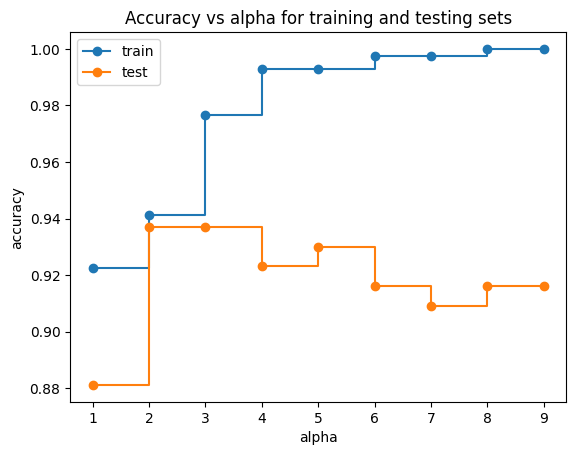

In [113]:
#plotando
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(range(1,10), train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(range(1,10), test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

## TODO 4

> Imprima a matriz de confusão (usando a Scikit-Learn)

> Obtenha a Acurácia, Precision, Recall e F1-Score

In [114]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

Confusion matrix, without normalization
[[51  2]
 [ 8 82]]
Normalized confusion matrix
[[0.96226415 0.03773585]
 [0.08888889 0.91111111]]


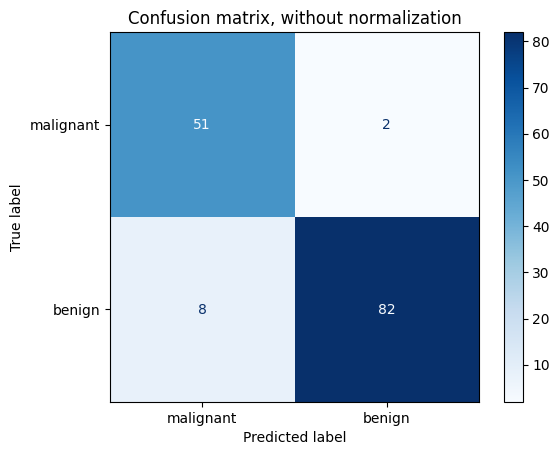

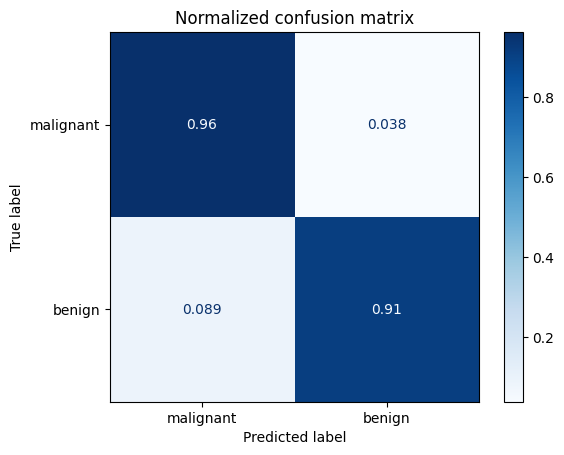

In [115]:
#resposta

from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clfs[4],
        X_test,
        y_test,
        display_labels=data.target_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [116]:
#resposta
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(accuracy_score(y_test, clfs[4].predict(X_test)))
print(precision_score(y_test, clfs[4].predict(X_test)))
print(recall_score(y_test, clfs[4].predict(X_test)))
print(f1_score(y_test, clfs[4].predict(X_test)))

0.9300699300699301
0.9761904761904762
0.9111111111111111
0.9425287356321839
